<a href="https://colab.research.google.com/github/vinayykkumar/Forecasting-Trends-with-Powerful-LSTM_Models_Infosys_Internship_Oct2024/blob/Samyuktha/Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stacked LSTM for Time Series Forecasting**

This project demonstrates how to use a Stacked LSTM (Long Short-Term Memory) model to predict future values of a time series dataset.
We use the Daily Minimum Temperatures in Melbourne, Australia (1981–1990) dataset for this demonstration.


In [1]:
!pip install tensorflow pandas matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


**Load the Dataset**

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)


**Preprocess the Data**

In [3]:
data = df['Temp'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

def create_dataset(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_dataset(data_scaled, time_steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Build the Stacked LSTM Model**

In [4]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(50, return_sequences=False),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

**Train the Model**

In [5]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0303 - val_loss: 0.0115
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0118 - val_loss: 0.0118
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0120 - val_loss: 0.0113
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0117 - val_loss: 0.0110
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0120 - val_loss: 0.0119
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0114 - val_loss: 0.0113
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0112 - val_loss: 0.0106
Epoch 8/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0106 - val_loss: 0.0102
Epoch 9/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0103 - val_loss: 0.0097
Epoch 10/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 11/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0102 - val_loss: 0.0086
Epoch 12/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0

**Evaluate and Visualize Results**

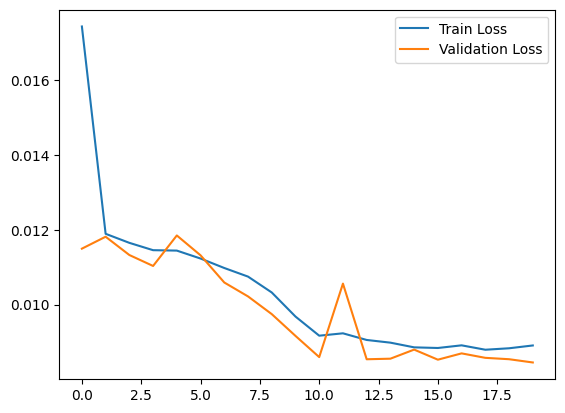

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


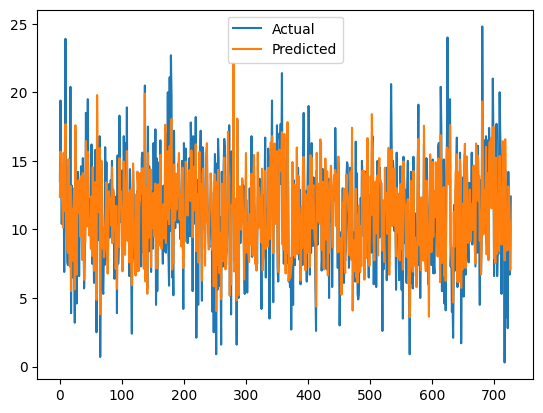

In [6]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.legend()
plt.show()
